## Análisis y Predicción de Salarios: Exploración, Visualización y Modelado de Datos utilizando Machine Learning

## Introducción:

El análisis de datos y la predicción de variables se han vuelto fundamentales en diversos campos, incluido el ámbito laboral. En este trabajo práctico, se aborda el desafío de analizar y predecir los salarios en función de un conjunto de variables relacionadas. Para lograr esto, se emplea un enfoque integral que incluye la exploración y visualización de un conjunto de datos de salarios, así como la implementación de un modelo de aprendizaje automático capaz de realizar predicciones precisas sobre el salario de un individuo.

El objetivo principal de este trabajo es proporcionar una comprensión profunda del conjunto de datos y establecer patrones o relaciones significativas entre las variables que pueden influir en el salario de una persona. Para ello, se utiliza un entorno de desarrollo Jupyter Notebook, que combina la flexibilidad del código Python con la capacidad de crear visualizaciones interactivas y narrativas que facilitan la interpretación de los resultados.

La primera parte del trabajo consiste en la exploración y limpieza de datos, donde se realiza un análisis detallado de las características del conjunto de datos, incluida la identificación y el tratamiento de valores atípicos, la detección y manejo de datos faltantes, y la normalización o estandarización de las variables relevantes. A continuación, se procede a la visualización de los datos mediante gráficos y tablas que permiten una representación más intuitiva y comprensible de la información.

Una vez completada la etapa de exploración y visualización de datos, se procede a la implementación de un modelo de aprendizaje automático. Se seleccione un método apropiado, como regresión lineal, regresión logística o árboles de decisión, que se ajuste mejor a la naturaleza de los datos y al objetivo de predicción de salarios. Se lleva a cabo un proceso de entrenamiento y validación del modelo, utilizando técnicas como validación cruzada y ajuste de hiperparámetros, para asegurar su precisión y generalización.

Finalmente, se evalúa el rendimiento del modelo utilizando métricas adecuadas para la tarea de predicción de salarios, como el error cuadrático medio (RMSE) o el coeficiente de determinación (R²). Se discuten los resultados obtenidos, se analizan las limitaciones del modelo y se sugieren posibles mejoras o áreas de investigación futura.

En resumen, este trabajo práctico proporciona una guía paso a paso para explorar, visualizar y modelar un conjunto de datos de salarios, utilizando técnicas de aprendizaje automático. El análisis detallado y la predicción precisa de los salarios tienen el potencial de proporcionar información valiosa para la toma de decisiones relacionadas con la compensación y el desarrollo de carreras en diversos contextos laborales.

## Exploracion del dataset

Contexto Analitico: Se nos proporciona un CSV de la empresa que contiene las siguientes columnas:

*timestamp*: Fecha donde se guardo la informacion

*company*: Empresa

*level*:Grado de responsabilidad en la empresa

*title*: Titulo Academico/Rubro

*totalyearlycompensation*: Salario Anual

*location*: Localizacion

*yearsofexperience*: Años de experiencia dentro del rubro

*yearsatcompany*: Años de antiguedad

*basesalary*: Salario base durante el año

*bonus*: Salario plus dependiendo de su desarrollo

*gender*: Genero

Esos entre otros datos, solo detallamos los mas importantes.

In [1]:
### Importamos librerias importantes
import pandas as pd
import numpy  as np
import matplotlib as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.pyplot       as plt
import statsmodels.formula.api as sm
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp

In [2]:
### Utilizamos nuestro dataset escogido
file_data = 'Levels_Fyi_Salary_Data.csv'
df_Original2 = pd.read_csv(file_data)
df_Original =pd.DataFrame(df_Original2)
df_Original = df_Original.drop(columns='Race')
df_Original= df_Original.drop(columns='Education')
df_Original.head(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.0,...,0,0,0,0,0,0,0,0,0,0
7,6/22/2017 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000.0,...,0,0,0,0,0,0,0,0,0,0
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
9,6/26/2017 21:25:45,Microsoft,63,Software Engineer,201000,"Seattle, WA",12.0,6.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_Original["level"].fillna("Undefined",inplace=True)
df_Original["tag"].fillna("Employee",inplace=True)
df_Original["company"].fillna("Company_SA",inplace=True)
df_Original["dmaid"] = pd.to_numeric(df_Original["dmaid"], errors="coerce")
df_Original["dmaid"].fillna(df_Original["dmaid"].mean(), inplace=True)
df_Original 

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,Employee,107000.0,...,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Employee,155000.0,...,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Employee,157000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,0,0
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,0,0
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,0,0
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_Original["gender"].replace("Title: Senior Software Engineer","Other",inplace=True)
df_Original["gender"].fillna("Other",inplace=True)
df_Original= df_Original.drop(columns='otherdetails')

<Axes: >

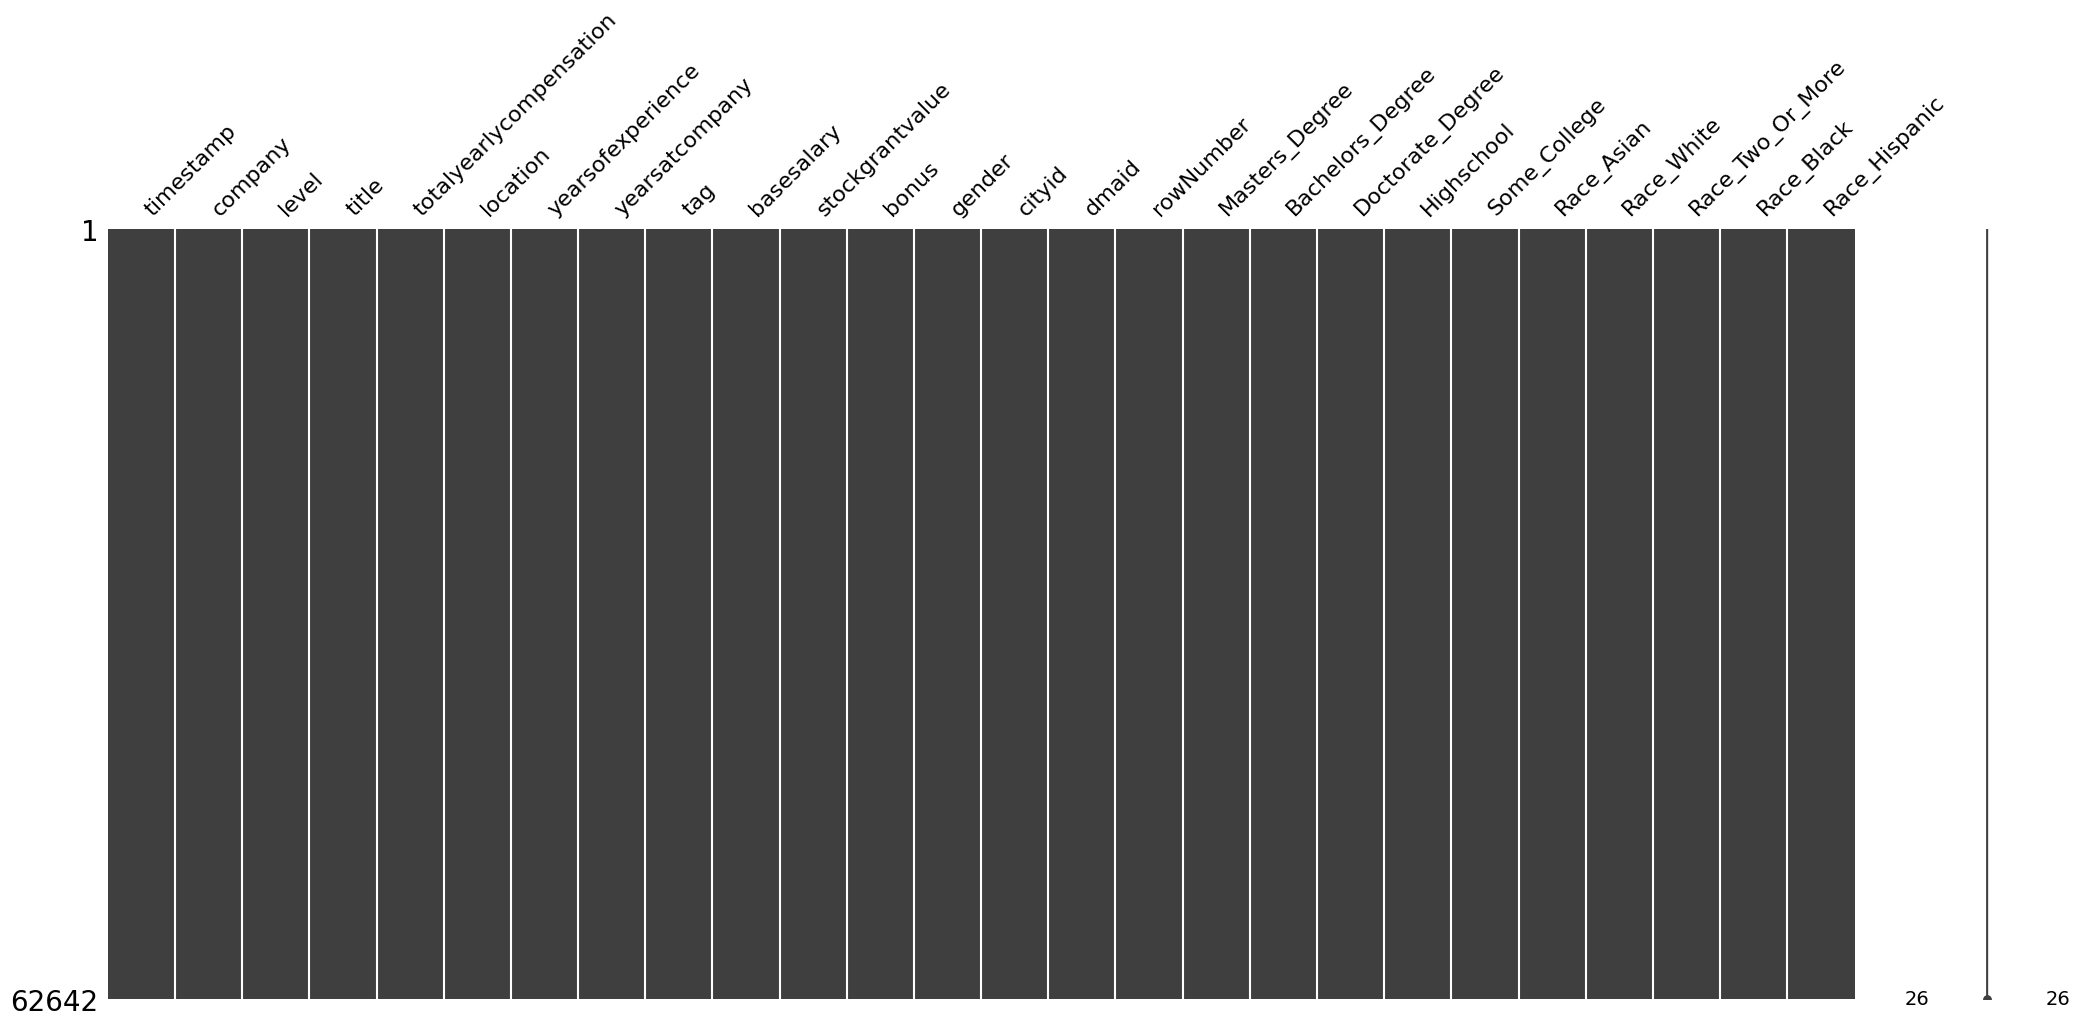

In [5]:
msno.matrix(df_Original)

## Observacion de Insights

In [6]:
import numpy                   as np
import scipy.stats as stats
z = np.abs(stats.zscore(df_Original["totalyearlycompensation"]))
z

0        0.646951
1        0.842557
2        0.678822
3        1.127991
4        0.429611
           ...   
62637    0.801981
62638    0.149962
62639    0.026803
62640    0.461482
62641    0.118091
Name: totalyearlycompensation, Length: 62642, dtype: float64

In [7]:
df_Original = df_Original[np.abs(stats.zscore(df_Original["totalyearlycompensation"]))<0.7]
df_Original

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,Employee,107000.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Employee,155000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,Employee,180000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62636,9/8/2018 14:01:06,eBay,Designer III,Product Designer,172000,"San Jose, CA",4.0,2.0,Design,142000.0,...,0,0,0,0,0,0,0,0,0,0
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,0,0
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,0,0
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,0,0


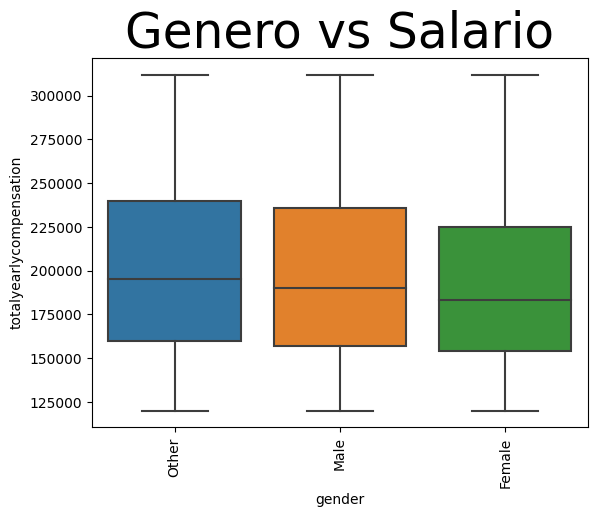

In [8]:
sns.boxplot(x='gender', y = "totalyearlycompensation", data = df_Original) 
plt.title("Genero vs Salario", fontsize=35)
plt.xticks(rotation=90);

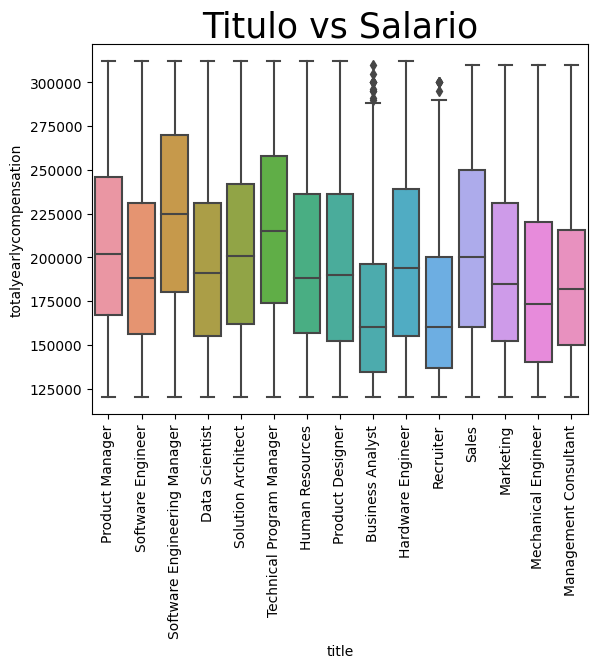

In [9]:
sns.boxplot(x='title', y = "totalyearlycompensation", data = df_Original) 
plt.title("Titulo vs Salario", fontsize=25)
plt.xticks(rotation=90);

In [10]:
model2 = 'totalyearlycompensation~title'
lm2    = sm.ols(formula = model2, data = df_Original).fit()
print(lm2.summary())

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.023
Model:                                 OLS   Adj. R-squared:                  0.023
Method:                      Least Squares   F-statistic:                     68.90
Date:                     Fri, 08 Aug 2025   Prob (F-statistic):          1.45e-194
Time:                             05:25:08   Log-Likelihood:            -4.9750e+05
No. Observations:                    40646   AIC:                         9.950e+05
Df Residuals:                        40631   BIC:                         9.952e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [11]:
df_data = df_Original[df_Original["title"]=="Data Scientist"]
df_data

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,0,0
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,0,0,0,0,0,0
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
499,6/17/2018 19:02:50,Amazon,L5,Data Scientist,200000,"Seattle, WA",3.0,0.0,ML / AI,150000.0,...,0,0,0,0,0,0,0,0,0,0
523,6/25/2018 8:45:29,Tesla,Senior Engineer,Data Scientist,168000,"Palo Alto, CA",8.0,3.0,Mechanical Engineering,118000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,2/10/2019 22:46:28,Deloitte,Senior Consultant,Data Scientist,190000,"Chicago, IL",3.0,0.0,ML / AI,160000.0,...,0,0,0,0,0,0,0,0,0,0
62240,3/26/2019 17:25:02,IBM,8,Data Scientist,155000,"Washington, DC",5.0,2.0,ML / AI,141000.0,...,0,0,0,0,0,0,0,0,0,0
62283,6/17/2018 21:07:18,Facebook,E3,Data Scientist,150000,"Singapore, SG, Singapore",0.0,0.0,ML / AI,150000.0,...,0,0,0,0,0,0,0,0,0,0
62285,7/16/2018 20:11:40,ADP,Sr UX Researcher 4,Data Scientist,185000,"Roseland, NJ",8.0,2.0,UX Research,150000.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
px.line(df_data, x='timestamp', y='totalyearlycompensation',labels={'x':'Date','y':'Salario'},
        title='Salario de todos')

In [13]:
df_datas = df_data[df_data["yearsatcompany"]==0]
df_datas2 = df_datas[df_datas["yearsofexperience"]==0]
df_datas2

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1147,9/7/2018 0:23:35,Apple,ICT3,Data Scientist,215000,"Cupertino, CA",0.0,0.0,ML / AI,125000.0,...,0,0,0,0,0,0,0,0,0,0
2008,10/16/2018 23:51:39,Lyft,T3,Data Scientist,250000,"San Francisco, CA",0.0,0.0,Product Analytics,130000.0,...,0,0,0,0,0,0,0,0,0,0
2603,11/6/2018 13:53:06,Facebook,E4,Data Scientist,230000,"Menlo Park, CA",0.0,0.0,ML / AI,0.0,...,0,0,0,0,0,0,0,0,0,0
2792,11/16/2018 11:36:25,Zillow,Entry,Data Scientist,205000,"Seattle, WA",0.0,0.0,ML / AI,0.0,...,0,0,0,0,0,0,0,0,0,0
2985,12/1/2018 13:38:49,Microsoft,59,Data Scientist,160000,"Redmond, WA",0.0,0.0,ML / AI,109000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59639,7/31/2021 0:02:18,Amazon,L4,Data Scientist,157000,"Seattle, WA",0.0,0.0,ML/AI,135000.0,...,0,0,0,0,0,0,0,0,0,0
60234,8/4/2021 18:25:28,Nielsen,L3,Data Scientist,132000,"Chicago, IL",0.0,0.0,Optimization,120000.0,...,0,0,1,0,0,1,0,0,0,0
60431,8/5/2021 22:12:22,Bank of America Merrill Lynch,Associate,Data Scientist,190000,"New York, NY",0.0,0.0,finance,125000.0,...,0,0,1,0,0,1,0,0,0,0
60487,8/6/2021 9:13:11,Microsoft,60,Data Scientist,162000,"Redmond, WA",0.0,0.0,NLP,120000.0,...,1,0,0,0,0,1,0,0,0,0


In [14]:
df_datas2mean = df_datas2.groupby(("timestamp"),as_index=False)["totalyearlycompensation"].mean()
df_datas2mean

,timestamp,totalyearlycompensation
0,1/10/2021 19:17:05,240000.0
1,1/11/2021 21:31:33,136000.0
2,1/13/2020 12:04:34,173000.0
3,1/13/2021 18:49:46,235000.0
4,1/15/2020 9:02:22,208000.0
...,...,...
114,9/25/2020 0:02:28,233000.0
115,9/28/2020 10:55:05,200000.0
116,9/4/2020 18:36:06,201000.0
117,9/6/2019 20:19:56,188000.0


In [15]:
px.line(df_datas2mean, x="timestamp", y='totalyearlycompensation',labels={'x':'Date','y':'Salario'},
        title='Salario Nuevos Empleados 0 Experiencia')

In [16]:
df_dat = df_data[df_data["yearsatcompany"]==1]
df_dat2 = df_dat[df_dat["yearsofexperience"]==1]
df_dat2

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1396,9/23/2018 12:10:49,Oath,Ic3,Data Scientist,160000,"New York, NY",1.0,1.0,Data,130000.0,...,0,0,0,0,0,0,0,0,0,0
1467,9/26/2018 22:14:28,Google,L4,Data Scientist,210000,"Mountain View, CA",1.0,1.0,Full Stack,132000.0,...,0,0,0,0,0,0,0,0,0,0
1468,9/26/2018 22:15:36,Google,L4,Data Scientist,210000,"Mountain View, CA",1.0,1.0,Full Stack,132000.0,...,0,0,0,0,0,0,0,0,0,0
2366,10/31/2018 21:24:09,Amazon,L4,Data Scientist,125000,"Seattle, WA",1.0,1.0,ML / AI,105000.0,...,0,0,0,0,0,0,0,0,0,0
4157,2/6/2019 15:51:14,S&P GLOBAL,13,Data Scientist,135000,"New York, NY",1.0,1.0,ML / AI,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,7/14/2021 18:13:25,Optiver,L1,Data Scientist,155000,"Chicago, IL",1.0,1.0,General,105000.0,...,0,1,0,0,0,1,0,0,0,0
58358,7/20/2021 17:55:49,JPMorgan Chase,Associate,Data Scientist,160000,"Hong Kong, HK, Hong Kong (SAR)",1.0,1.0,Quant/Trading - QR,110000.0,...,1,0,0,0,0,0,0,0,0,0
59242,7/27/2021 21:40:35,Optiver,L1,Data Scientist,185000,"Chicago, IL",1.0,1.0,General,115000.0,...,0,1,0,0,0,0,0,1,0,0
60198,8/4/2021 15:10:22,IBM,L7,Data Scientist,132000,"Seattle, WA",1.0,1.0,General,132000.0,...,0,0,1,0,0,1,0,0,0,0


In [17]:
df_dat2mean = df_dat2.groupby(("timestamp"),as_index=False)["totalyearlycompensation"].mean()
df_dat2mean

,timestamp,totalyearlycompensation
0,1/14/2020 20:55:58,235000.0
1,1/17/2021 22:26:50,183000.0
2,1/20/2020 17:54:42,200000.0
3,1/20/2020 19:22:47,135000.0
4,1/27/2021 3:16:30,294000.0
...,...,...
88,9/23/2020 21:47:02,225000.0
89,9/26/2018 22:14:28,210000.0
90,9/26/2018 22:15:36,210000.0
91,9/28/2020 13:37:34,170000.0


In [18]:
px.line(df_dat2mean, x='timestamp', y='totalyearlycompensation',labels={'x':'Date','y':'Salario'},
        title='Salario Nuevos Empleados con 1 Año de experiencia')

In [19]:
df_Original_pie = df_Original[["title","totalyearlycompensation","yearsofexperience","yearsatcompany"]]

In [20]:
df_Original_pie2 = df_Original_pie[df_Original_pie["yearsatcompany"]<=1]
df_Original_pie2

,title,totalyearlycompensation,yearsofexperience,yearsatcompany
2,Product Manager,310000,8.0,0.0
8,Software Engineer,120000,3.0,1.0
14,Software Engineering Manager,287000,12.0,1.0
15,Software Engineer,218000,10.0,0.0
16,Software Engineer,168000,1.0,1.0
...,...,...,...,...
62627,Software Engineer,169000,0.0,0.0
62628,Product Manager,171000,1.0,1.0
62629,Software Engineer,132000,0.0,0.0
62633,Software Engineer,230000,5.0,1.0


In [21]:
df_Original_pie3 = df_Original_pie2[df_Original_pie2["yearsofexperience"]<=1]

In [22]:
df_torta = df_Original_pie3.groupby("title")["title"].count()
df_torta = pd.DataFrame(df_torta)
df_torta.rename(columns= {"title" : "Cantidad de Trabajadores"}, inplace=True)
df_torta =df_torta.sort_values("Cantidad de Trabajadores",ascending=False)
df_torta

,Cantidad de Trabajadores
title,
Software Engineer,4728
Data Scientist,265
Product Manager,187
Hardware Engineer,148
Product Designer,62
Solution Architect,29
Mechanical Engineer,24
Technical Program Manager,24
Business Analyst,11


In [23]:
df_tortaother = df_torta[df_torta["Cantidad de Trabajadores"]<28].sum()
df_tortaother

Cantidad de Trabajadores    94
dtype: int64

In [24]:
df_torta7 = df_torta.head(7)
df_torta7

,Cantidad de Trabajadores
title,
Software Engineer,4728
Data Scientist,265
Product Manager,187
Hardware Engineer,148
Product Designer,62
Solution Architect,29
Mechanical Engineer,24


In [25]:
nuevo_valor = {"Cantidad de Trabajadores":[92]}
nuevo_valor = pd.DataFrame(data=nuevo_valor)
nuevo_valor.index = ["Other"]
nuevo_valor

,Cantidad de Trabajadores
Other,92


In [26]:
df_torta7other = pd.concat([df_torta7,nuevo_valor])
df_torta7other

,Cantidad de Trabajadores
Software Engineer,4728
Data Scientist,265
Product Manager,187
Hardware Engineer,148
Product Designer,62
Solution Architect,29
Mechanical Engineer,24
Other,92


In [27]:
px.pie(df_torta7other, values='Cantidad de Trabajadores', names= df_torta7other.index)

In [28]:
df_bar = pd.DataFrame(df_Original_pie3.groupby('title')['totalyearlycompensation'].mean())
df_bar["totalyearlycompensation"] = df_bar["totalyearlycompensation"].round(2)
df_bar

,totalyearlycompensation
title,
Business Analyst,148454.55
Data Scientist,181732.08
Hardware Engineer,160506.76
Human Resources,134000.00
Management Consultant,170727.27
Marketing,159888.89
Mechanical Engineer,159458.33
Product Designer,163129.03
Product Manager,165272.73


In [29]:
px.bar(df_bar, x=df_bar.index, y='totalyearlycompensation',color="totalyearlycompensation")

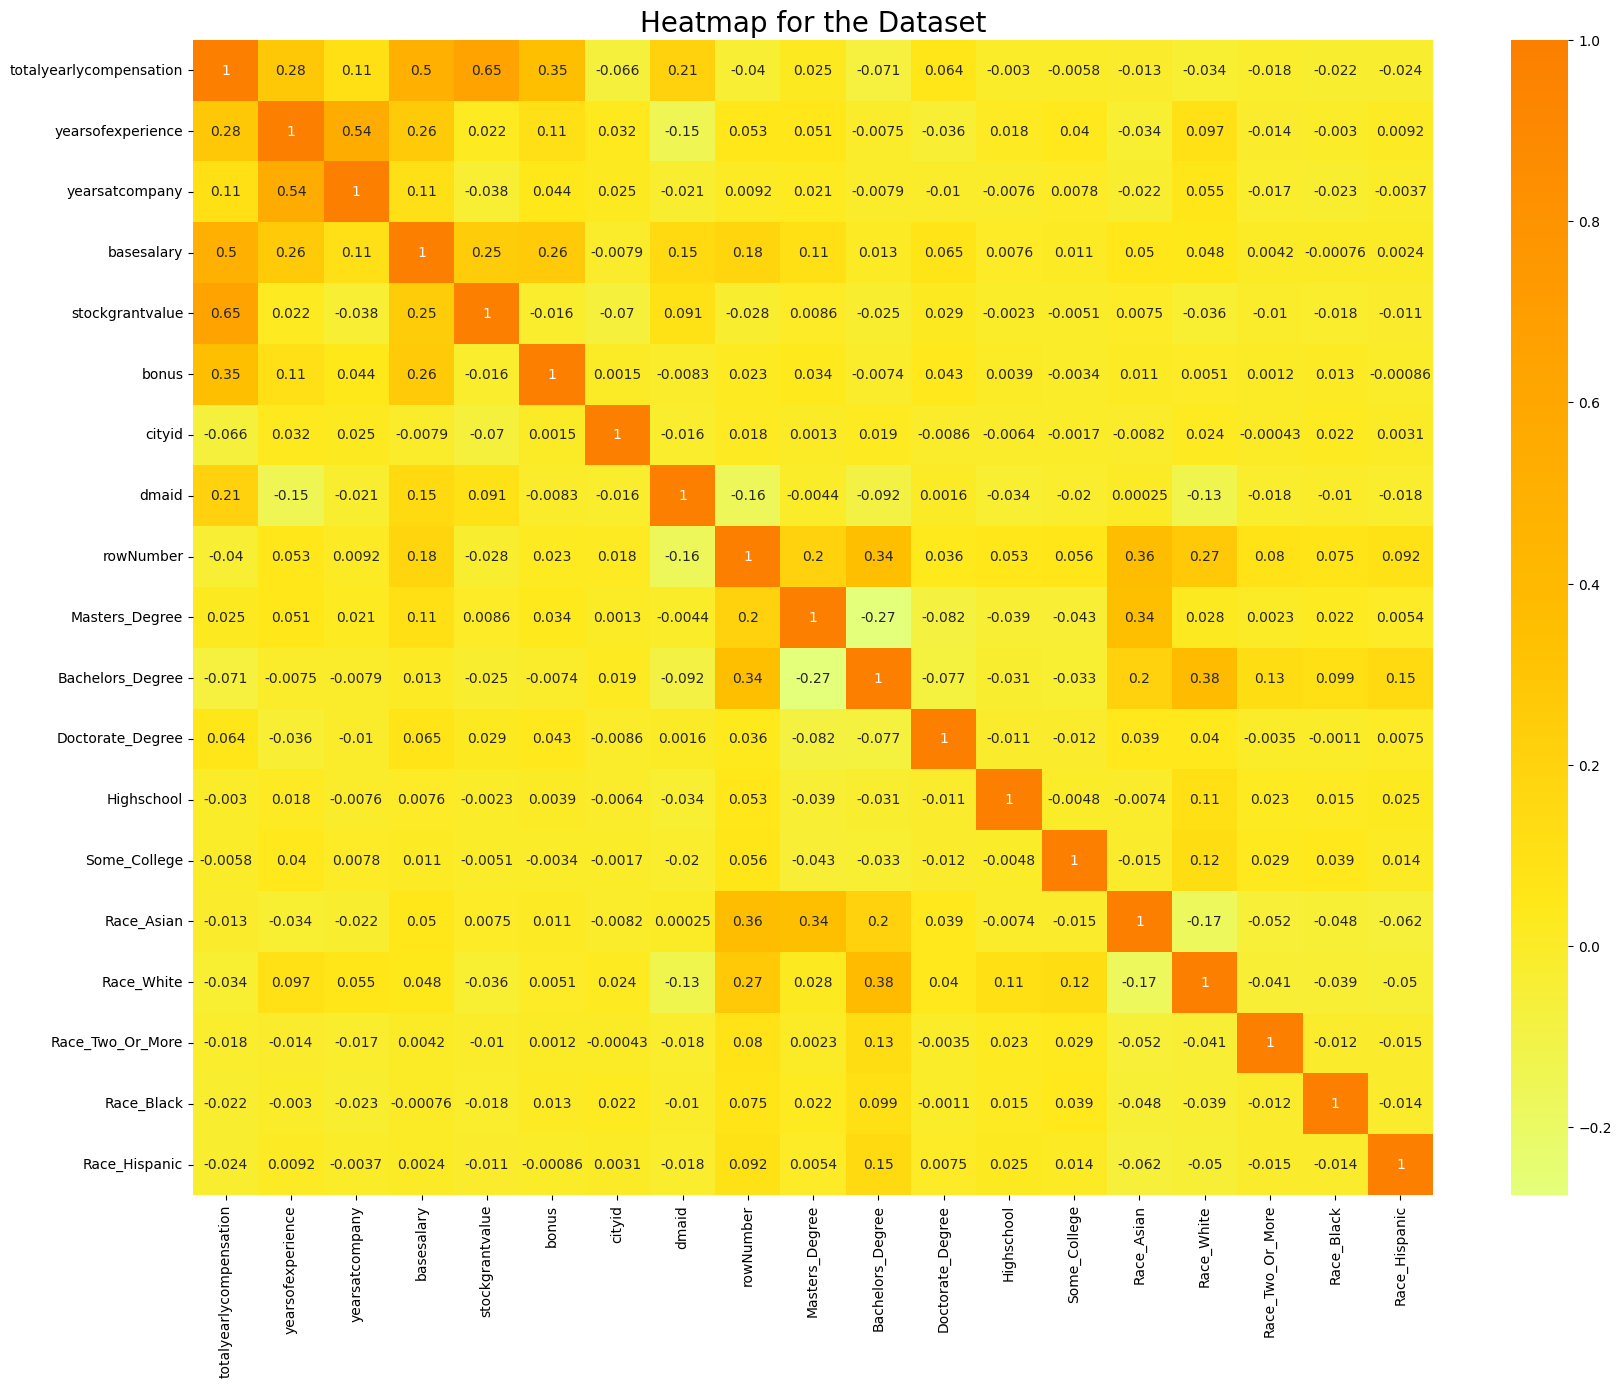

In [30]:
numeric_df = df_Original.select_dtypes(include=['number'])
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(numeric_df.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap for the Dataset', fontsize=20)
plt.show()

### Modelo de prediccion de Machine Learning

In [31]:
df_Original

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,Employee,107000.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Employee,155000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,Employee,0.0,...,0,0,0,0,0,0,0,0,0,0
6,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,Employee,180000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62636,9/8/2018 14:01:06,eBay,Designer III,Product Designer,172000,"San Jose, CA",4.0,2.0,Design,142000.0,...,0,0,0,0,0,0,0,0,0,0
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,0,0
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,0,0
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
### Importante aclarar que casi el 25% de los valores dieron que estaban fuera del ZScore, un gran porcentaje de nuestra data
nuevo3= df_Original[["totalyearlycompensation","yearsofexperience","company","title","tag"]]
nuevo3

,totalyearlycompensation,yearsofexperience,company,title,tag
0,127000,1.5,Oracle,Product Manager,Employee
2,310000,8.0,Amazon,Product Manager,Employee
4,157000,5.0,Microsoft,Software Engineer,Employee
5,208000,8.5,Microsoft,Software Engineer,Employee
6,300000,15.0,Microsoft,Software Engineering Manager,Employee
...,...,...,...,...,...
62636,172000,4.0,eBay,Product Designer,Design
62638,237000,2.0,Microsoft,Software Engineer,Full Stack
62639,220000,14.0,MSFT,Software Engineer,Full Stack
62640,280000,8.0,Salesforce,Software Engineer,iOS


In [33]:
X3 = nuevo3.iloc[:,1:5]
Y3 = nuevo3.iloc[:,0]

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import lightgbm as lgb

In [35]:
### Aca vamos a importar una nueva funcionn para transformarlas en una misma columna diferentes numeros representativos
le = preprocessing.LabelEncoder()
company_codified = le.fit_transform(nuevo3.company)

In [36]:
X3.company = le.fit_transform(X3.company)
X3.title = le.fit_transform(X3.title)
X3.tag = le.fit_transform(X3.tag)
X3

,yearsofexperience,company,title,tag
0,1.5,821,8,666
2,8.0,57,8,666
4,5.0,730,11,666
5,8.5,730,11,666
6,15.0,730,12,666
...,...,...,...,...
62636,4.0,1278,7,527
62638,2.0,730,11,780
62639,14.0,675,11,780
62640,8.0,951,11,2096


In [37]:
from lazypredict.Supervised import LazyRegressor
X3_train , X3_test, Y3_train, Y3_test = train_test_split(X3,Y3,test_size=0.2, random_state=50)

Esas features hicieron que sea muy bajo el rendimiento de los diferentes modelos, asi que vamos a probar en las 4 que elegimos anterioremente

In [38]:
# Importa las clases de todos los modelos que vas a usar
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import Lasso, Ridge, HuberRegressor, LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Crea la lista de tuplas con el nombre y la CLASE del modelo, sin los paréntesis ()
modelos_a_incluir = [
    ('Lasso', Lasso),
    ('Ridge', Ridge),
    ('HuberRegressor', HuberRegressor),
    ('RandomForestRegressor', RandomForestRegressor),
    ('ExtraTreesRegressor', ExtraTreesRegressor),
    ('LGBMRegressor', LGBMRegressor),
    ('LinearRegression', LinearRegression)
]

# Inicializa LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=modelos_a_incluir)

# Prepara tus datos (ejemplo)
X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena y evalúa los modelos
models, predictions = reg.fit(X3_train, X3_test, Y3_train, Y3_test)

# Imprime los resultados
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 4.566453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor es un modelo que mejor porcentaje tuvo, aunque todavia muy bajo. Vamos a probarlo y entrenarlo

In [39]:
nuevo_k= df_Original[["totalyearlycompensation","yearsofexperience","basesalary","yearsatcompany","title"]]
nuevo_k

,totalyearlycompensation,yearsofexperience,basesalary,yearsatcompany,title
0,127000,1.50,107000.00,1.50,Product Manager
2,310000,8.00,155000.00,0.00,Product Manager
4,157000,5.00,0.00,3.00,Software Engineer
5,208000,8.50,0.00,8.50,Software Engineer
6,300000,15.00,180000.00,11.00,Software Engineering Manager
...,...,...,...,...,...
62636,172000,4.00,142000.00,2.00,Product Designer
62638,237000,2.00,146900.00,2.00,Software Engineer
62639,220000,14.00,157000.00,12.00,Software Engineer
62640,280000,8.00,194688.00,4.00,Software Engineer


In [40]:
le.fit(nuevo_k['title'])
nuevo_k.title = le.transform(nuevo_k.title)
nuevo_k

,totalyearlycompensation,yearsofexperience,basesalary,yearsatcompany,title
0,127000,1.50,107000.00,1.50,8
2,310000,8.00,155000.00,0.00,8
4,157000,5.00,0.00,3.00,11
5,208000,8.50,0.00,8.50,11
6,300000,15.00,180000.00,11.00,12
...,...,...,...,...,...
62636,172000,4.00,142000.00,2.00,7
62638,237000,2.00,146900.00,2.00,11
62639,220000,14.00,157000.00,12.00,11
62640,280000,8.00,194688.00,4.00,11


In [41]:
X = nuevo_k.iloc[:,1:5]
Y = nuevo_k.iloc[:,0]

In [42]:
X

,yearsofexperience,basesalary,yearsatcompany,title
0,1.50,107000.00,1.50,8
2,8.00,155000.00,0.00,8
4,5.00,0.00,3.00,11
5,8.50,0.00,8.50,11
6,15.00,180000.00,11.00,12
...,...,...,...,...
62636,4.00,142000.00,2.00,7
62638,2.00,146900.00,2.00,11
62639,14.00,157000.00,12.00,11
62640,8.00,194688.00,4.00,11


In [43]:
Dummies = pd.get_dummies(X["title"])

In [44]:
X = pd.concat([
    X.drop("title", axis = 1),
    Dummies
], axis = 1)

In [45]:
X

,yearsofexperience,basesalary,yearsatcompany,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.50,107000.00,1.50,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,8.00,155000.00,0.00,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,5.00,0.00,3.00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,8.50,0.00,8.50,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,15.00,180000.00,11.00,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62636,4.00,142000.00,2.00,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
62638,2.00,146900.00,2.00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
62639,14.00,157000.00,12.00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
62640,8.00,194688.00,4.00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [46]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=50)

In [47]:
import lightgbm as lgb


In [48]:
model = lgb.LGBMRegressor(force_col_wise= True)
model.fit(X_train, Y_train)

[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 32516, number of used features: 18
[LightGBM] [Info] Start training from score 198443.792287


LGBMRegressor(force_col_wise=True)

In [49]:
expected_y  = Y_test
predicted_y = model.predict(X_test)

In [50]:
expected_y

37762    159000
37979    288000
2258     214000
27618    170000
15562    295000
          ...  
44013    180000
21341    120000
6865     170000
9741     170000
33862    185000
Name: totalyearlycompensation, Length: 8130, dtype: int64

In [51]:
predicted_y 

array([177137.7828006 , 260302.70891983, 199039.76950002, ...,
       172819.90678976, 224593.49153608, 177630.68640891])

In [52]:
error=np.sqrt(mean_squared_error(Y_test,predicted_y))
r2=model.score(X,Y)
print("El error es: ",error)
print("El valor de r2 es: ",r2)

El error es:  32671.236508002476
El valor de r2 es:  0.6118885721081027


# Agregar ponderaciones y mejora del modelo

In [53]:
nuevo_k= df_Original[["totalyearlycompensation","yearsofexperience","yearsatcompany","basesalary","title"]]
nuevo_k

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,title
0,127000,1.50,1.50,107000.00,Product Manager
2,310000,8.00,0.00,155000.00,Product Manager
4,157000,5.00,3.00,0.00,Software Engineer
5,208000,8.50,8.50,0.00,Software Engineer
6,300000,15.00,11.00,180000.00,Software Engineering Manager
...,...,...,...,...,...
62636,172000,4.00,2.00,142000.00,Product Designer
62638,237000,2.00,2.00,146900.00,Software Engineer
62639,220000,14.00,12.00,157000.00,Software Engineer
62640,280000,8.00,4.00,194688.00,Software Engineer


In [54]:
nuevo_k = nuevo_k[nuevo_k["basesalary"]!=0]
nuevo_k

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,title
0,127000,1.50,1.50,107000.00,Product Manager
2,310000,8.00,0.00,155000.00,Product Manager
6,300000,15.00,11.00,180000.00,Software Engineering Manager
7,156000,4.00,4.00,135000.00,Software Engineer
9,201000,12.00,6.00,157000.00,Software Engineer
...,...,...,...,...,...
62636,172000,4.00,2.00,142000.00,Product Designer
62638,237000,2.00,2.00,146900.00,Software Engineer
62639,220000,14.00,12.00,157000.00,Software Engineer
62640,280000,8.00,4.00,194688.00,Software Engineer


In [55]:
nuevo_k["Antiguedad"] = (nuevo_k["yearsofexperience"]/2)+(nuevo_k["yearsatcompany"]/2)
nuevo_k = nuevo_k[["totalyearlycompensation","basesalary","Antiguedad","title"]]

In [56]:
nuevo_k

,totalyearlycompensation,basesalary,Antiguedad,title
0,127000,107000.00,1.50,Product Manager
2,310000,155000.00,4.00,Product Manager
6,300000,180000.00,13.00,Software Engineering Manager
7,156000,135000.00,4.00,Software Engineer
9,201000,157000.00,9.00,Software Engineer
...,...,...,...,...
62636,172000,142000.00,3.00,Product Designer
62638,237000,146900.00,2.00,Software Engineer
62639,220000,157000.00,13.00,Software Engineer
62640,280000,194688.00,6.00,Software Engineer


In [57]:
le.fit(nuevo_k['title'])
nuevo_k.title = le.transform(nuevo_k.title)
nuevo_k

,totalyearlycompensation,basesalary,Antiguedad,title
0,127000,107000.00,1.50,8
2,310000,155000.00,4.00,8
6,300000,180000.00,13.00,12
7,156000,135000.00,4.00,11
9,201000,157000.00,9.00,11
...,...,...,...,...
62636,172000,142000.00,3.00,7
62638,237000,146900.00,2.00,11
62639,220000,157000.00,13.00,11
62640,280000,194688.00,6.00,11


In [58]:
X = nuevo_k.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [59]:
datos = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    datos.append(kmeans.inertia_)

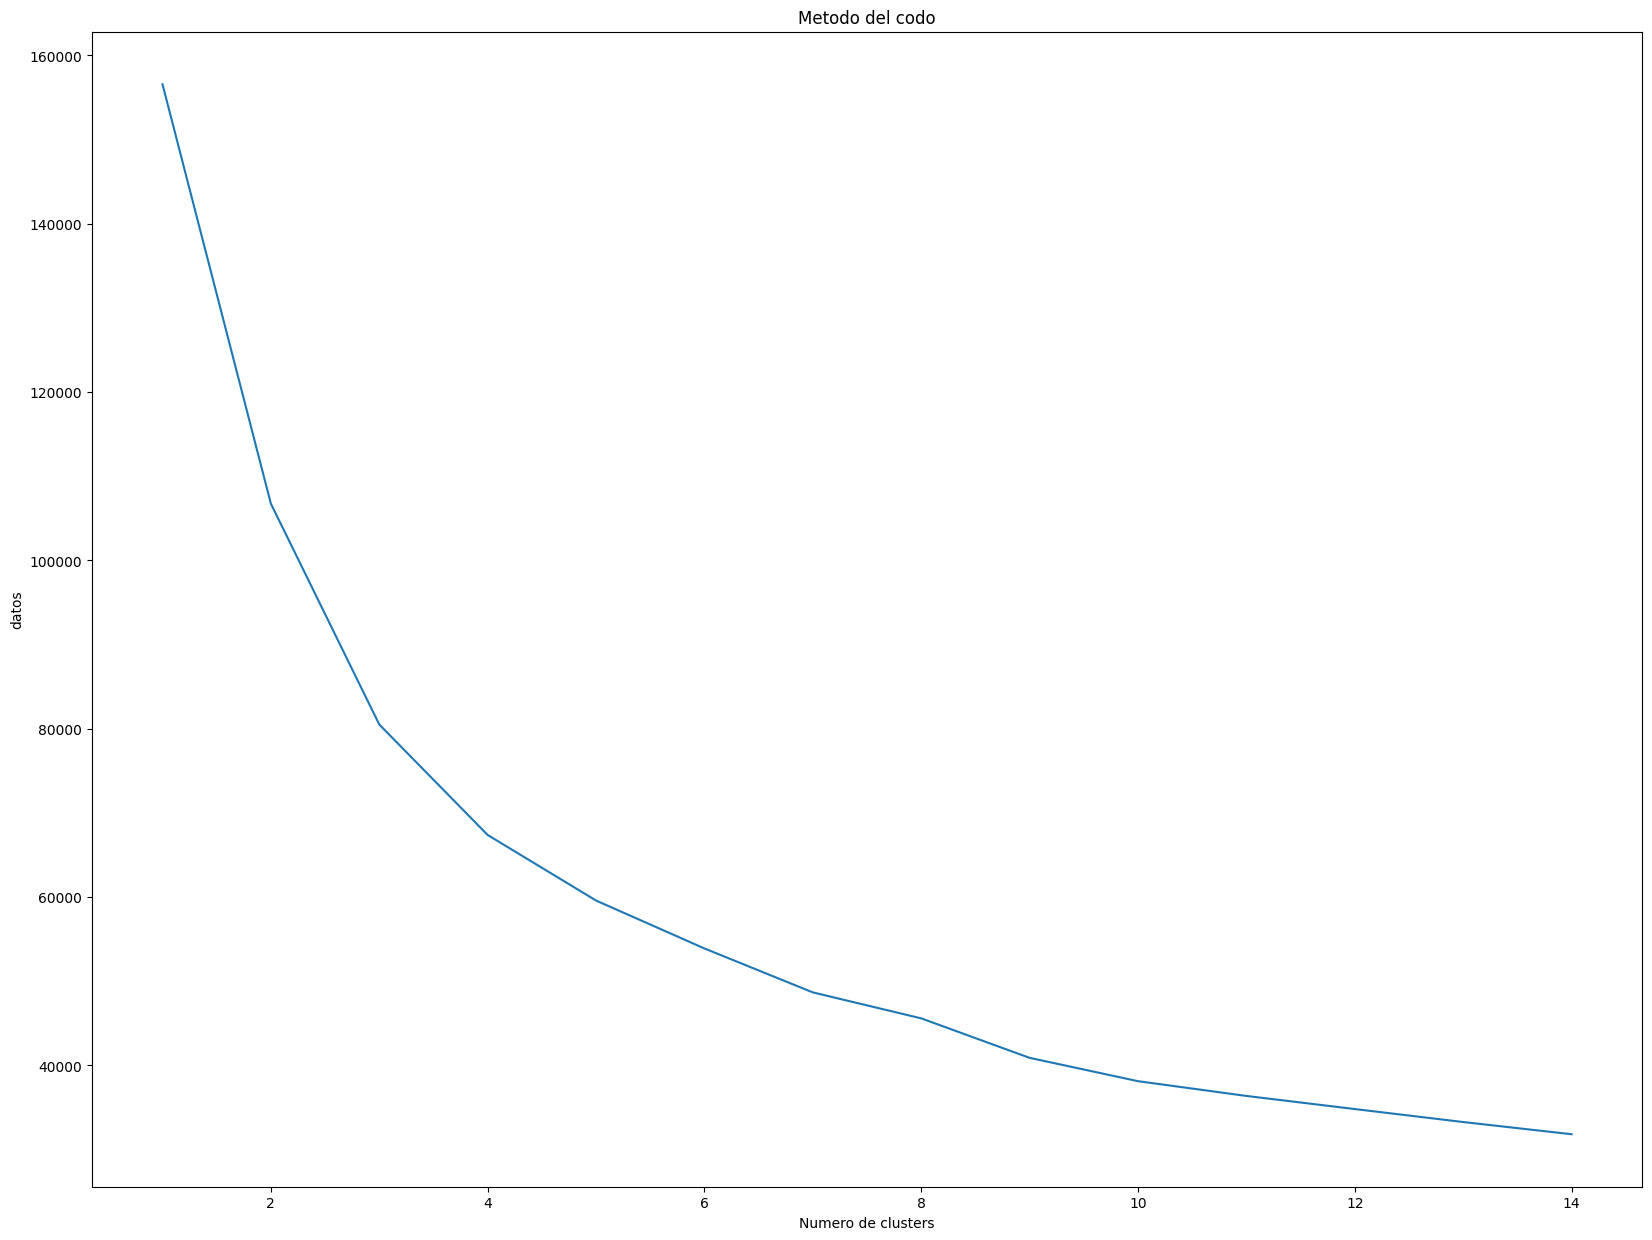

In [60]:
plt.plot(range(1, 15), datos)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('datos')
plt.show()

In [61]:
db = {}
for k in range(2, 15):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin

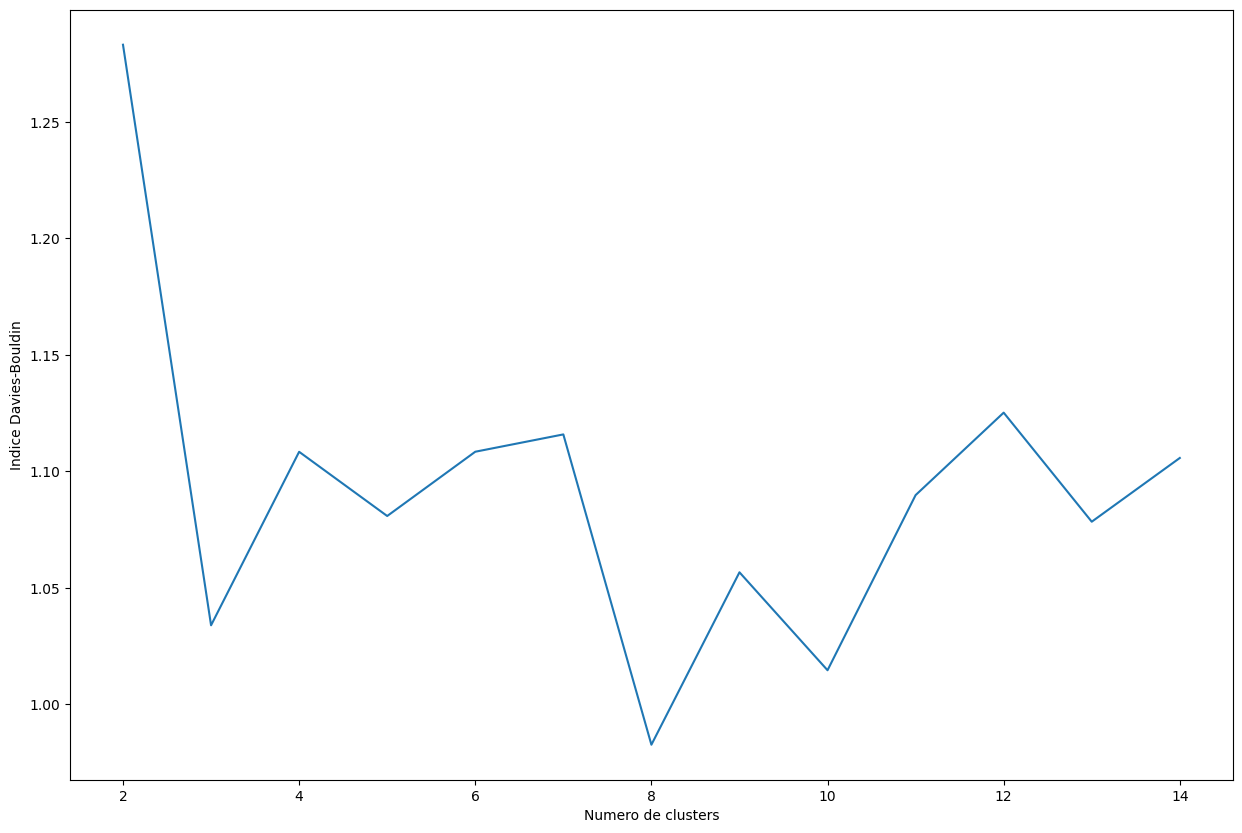

In [62]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

In [63]:
scl = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=15).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ 
    scl[k] = silhouette_score(X,clusters)

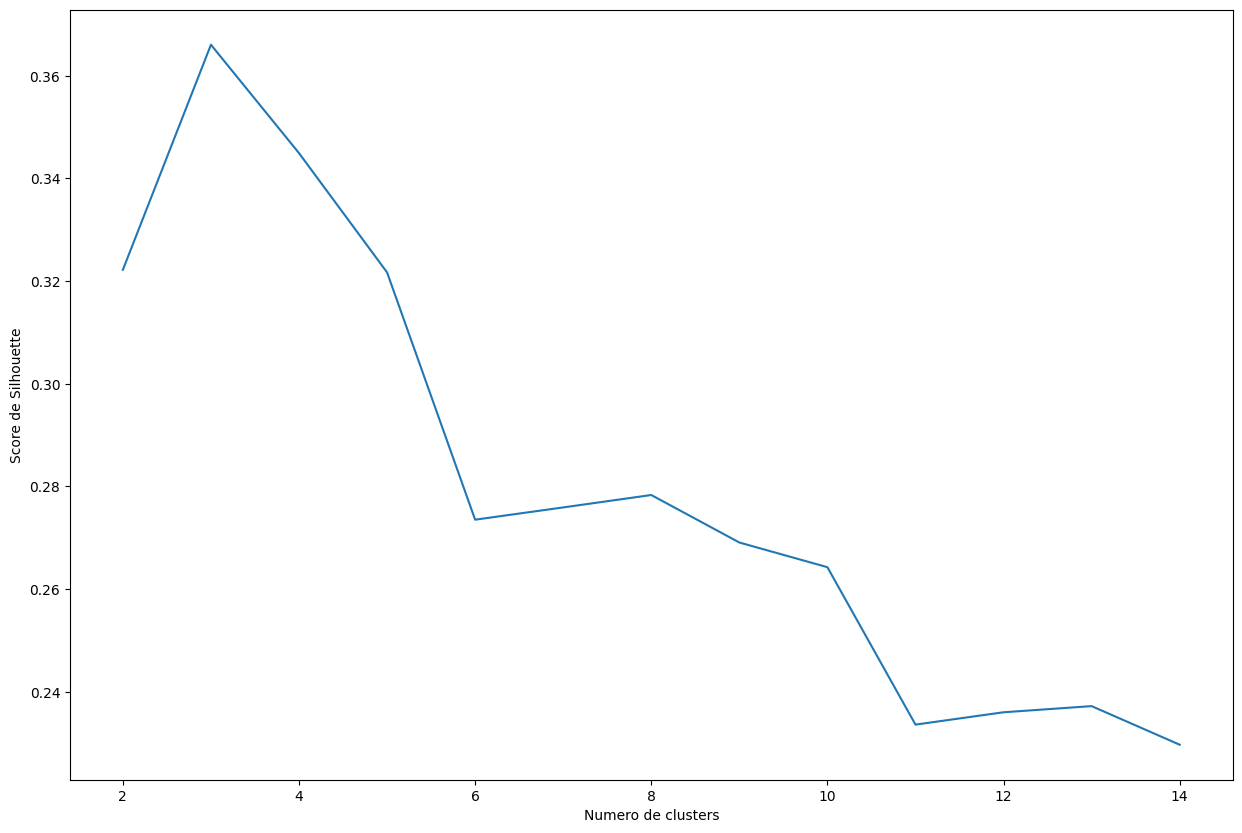

In [64]:
plt.figure(figsize=(15,10))
plt.plot(list(scl.keys()), list(scl.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

In [65]:
#Asumo que el numero de cluster es igual a 3 entonces:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 30)
y_kmeans = kmeans.fit_predict(X)

In [66]:
nuevo_k['Tipo de salario'] = y_kmeans
nuevo_k

,totalyearlycompensation,basesalary,Antiguedad,title,Tipo de salario
0,127000,107000.00,1.50,8,0
2,310000,155000.00,4.00,8,1
6,300000,180000.00,13.00,12,1
7,156000,135000.00,4.00,11,0
9,201000,157000.00,9.00,11,1
...,...,...,...,...,...
62636,172000,142000.00,3.00,7,0
62638,237000,146900.00,2.00,11,1
62639,220000,157000.00,13.00,11,1
62640,280000,194688.00,6.00,11,1


In [67]:
nuevo_k.groupby(['Tipo de salario']).mean()

,totalyearlycompensation,basesalary,Antiguedad,title
Tipo de salario,,,,
0,165733.54,127209.49,3.17,10.72
1,245830.48,169399.72,6.82,10.71
2,191085.82,143717.84,4.96,2.11


## Conclusiones:

este trabajo práctico ha abordado el desafío de analizar y predecir los salarios utilizando técnicas de visualización de datos y modelado de aprendizaje automático. A través de la exploración exhaustiva del conjunto de datos y la aplicación de algoritmos de aprendizaje automático, se han obtenido resultados significativos y valiosos.

En la etapa de exploración y visualización de datos, se ha logrado comprender la estructura del conjunto de datos, identificar patrones y relaciones entre las variables, y detectar posibles valores atípicos o datos faltantes. La visualización de los datos ha realizado un papel fundamental en la comprensión y comunicación de los resultados, ya que ha permitido representar gráficamente las características clave del conjunto de datos de salarios.

Posteriormente, mediante la implementación de un modelo de aprendizaje automático adecuado, se ha logrado predecir los salarios con precisión utilizando las variables relevantes. La selección del algoritmo de aprendizaje automático apropiado, junto con técnicas de entrenamiento y validación adecuada, ha permitido construir un modelo fiable y generalizable.

Los resultados obtenidos en este trabajo tienen implicaciones prácticas significativas. Por un lado, han proporcionado una comprensión profunda de los factores que influyen en los salarios, lo que puede ser útil para los consumidores, profesionales de recursos humanos y personas dispuestas a comprender las dinámicas salariales. Además, la capacidad de predecir los salarios con precisión puede ser valiosa para la planificación financiera personal, la toma de decisiones laborales y el diseño de políticas salariales equitativas.

Es importante mencionar que este trabajo no está exento de limitaciones. La precisión de las predicciones puede depender de la calidad y representatividad del conjunto de datos utilizados, así como de la elección y configuración del modelo de aprendizaje automático. Además, existen otras variables no consideradas en este análisis que podrían influir en los salarios y que podrían ser exploradas en futuras investigaciones.

En resumen, este trabajo práctico ha proporcionado una metodología sólida para explorar, visualizar y modelar datos de salarios, utilizando técnicas de aprendizaje automático. Los resultados obtenidos han permitido comprender mejor los factores que influyen en los salarios y realizar predicciones precisas. Este enfoque tiene un amplio potencial de aplicación en diversos campos y puede brindar información valiosa para la toma de decisiones informadas en el ámbito laboral y financiero